In [2]:
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt

In [429]:
h_th/(xi*np.sqrt(1+eta*eta))

0.01176687351093661

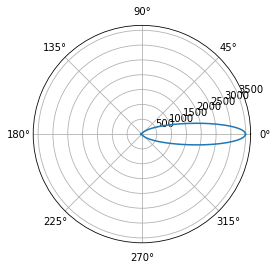

In [250]:
# non-linear compton scattering cross-section in theta

E = 10e6
omega_L = 1e7
eta = 100
m = 0.512e6
alpha = 1/137

def u_from_theta(theta, n):
    return (n*omega_L/m)*(1-np.cos(theta))

def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    u_over_u_n = u/(2*n*omega_L/m)
    return pref*np.sqrt(u_over_u_n*(1-u_over_u_n))

def p_n(u, n):
    jnp1 = sp.jv(n+1,z(u, n))**2
    jn   = sp.jv(n,z(u, n))**2
    jnm1 = sp.jv(n-1,z(u, n))**2

    pref = ((alpha**2)*m*m/E)/((1+u)**2)
    return -pref * (jn + eta**2/2 * (jn - jnm1/2 -jnp1/2)*(1+u*u/(2*(1+u))))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

for n in range(1,2, 1):
    theta = np.linspace(0, 2*np.pi, 10000)
    u = u_from_theta(theta, n)
    ax.plot(theta, p_n(u, n))
    #ax.set_yscale('log')
    #ax[0].set_xscale('log')


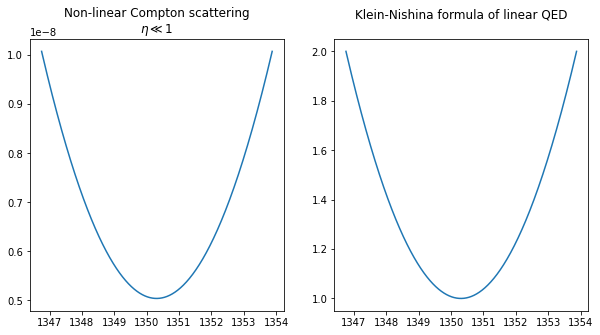

In [464]:
# non-linear compton scattering cross-section in electron rest frame in omega'

omega_L = 1.55
E = 10e9
m = 0.512e6
eta = 0.001
theta_0 = 17.2
h_th = 1-np.cos(theta_0*np.pi/180)

alpha = 1/137

def u_from_omega_p(theta, n):
    return n*omega_L_r/omega_p - 1

def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    return pref*np.sqrt(u*(1-u))

def p_n(u, u_n, n):
    jnp1 = sp.jv(n+1,z(u/u_n, n))**2
    jn   = sp.jv(n,z(u/u_n, n))**2
    jnm1 = sp.jv(n-1,z(u/u_n, n))**2

    pref = ((alpha**2)*m)/(n*omega_L_r)
    return -pref * (jn + eta**2 * (jn - jnm1/2 -jnp1/2)*(1+u*u/(2*(1+u))))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for n in range(1,2, 1):
    omega_L_r = omega_L*E*h_th/(m*np.sqrt(1+eta**2))
    omega_p = np.linspace(
        n*omega_L_r, 
        n*omega_L_r/(1+2*n*omega_L_r/(m*np.sqrt(1+eta**2))), 
        10000)

    u = u_from_omega_p(omega_p, n)
    u_n = 2*n*omega_L_r/(m*np.sqrt(1+eta**2))
    ax[0].plot(omega_p, p_n(u, u_n, n))
    ax[0].set_title('Non-linear Compton scattering\n'+r'$\eta \ll 1$' )

    omega_L_r = omega_L*E*h_th/m
    omega_p = np.linspace(
        n*omega_L_r, 
        n*omega_L_r/(1+2*n*omega_L_r/m), 
        10000)

    ax[1].plot(omega_p, (omega_L_r/omega_p + omega_p/omega_L_r + m*m*(1/omega_p - 1/omega_L_r)**2 - 2*m*(1/omega_p - 1/omega_L_r)))
    ax[1].set_title('Klein-Nishina formula of linear QED\n' )



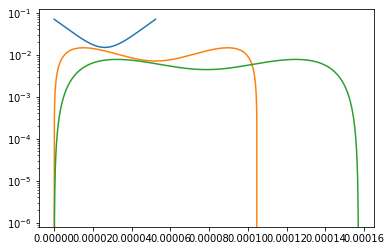

In [465]:
# non-linear compton scattering cross-section in u

E = 1e10
omega_L = 1.55
eta = 10
m = 0.512e6
alpha = 1/137
h_th = 1-np.cos(theta_0*np.pi/180)


def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    return pref*np.sqrt(u*(1-u))

def p_n(u, u_n, n):
    jnp1 = sp.jv(n+1,z(u/u_n, n))**2
    jn   = sp.jv(n,z(u/u_n, n))**2
    jnm1 = sp.jv(n-1,z(u/u_n, n))**2

    pref = ((alpha**2)*m*m/E)/((1+u)**2)
    return -pref * (jn + eta**2 * (jn - jnm1/2 -jnp1/2)*(1+u*u/(2*(1+u))))

fig, ax = plt.subplots()

for n in range(1,4, 1):
    u_n = 2*n*omega_L*E*h_th/(m*m*(1+eta**2))
    u = np.linspace(0, u_n, 1000)
    ax.plot(u, p_n(u, u_n, n))
    ax.set_yscale('log')
    #ax[0].set_xscale('log')


100000
200000
300000


C:\Users\BCimr\AppData\Local\Temp\ipykernel_7812\4037166233.py:21: RuntimeWarning: invalid value encountered in sqrt
  return pref*np.sqrt(u*(1-u))


400000
500000
600000
700000
800000
900000
1000000


(1e-05, 0.1)

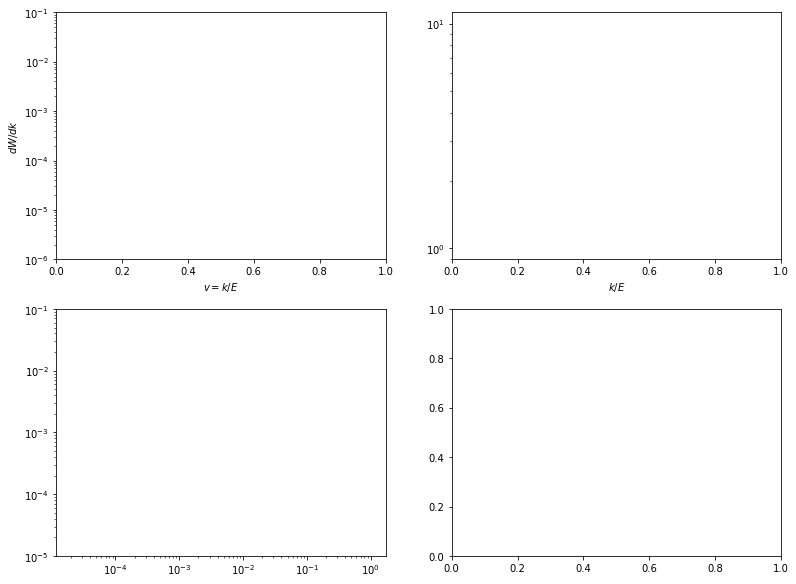

In [512]:
# non-linear compton scattering cross-section

E = 10e9
omega_L = 1.55
eta = 10
m = 0.512e6
chi = omega_L/E
xi = m*m/(E*omega_L)
theta_0 = 180
h_th = 1-np.cos(theta_0*np.pi/180)
alpha = 1/137

def v_max(n):
    return (1+n*chi)*(2*n*h_th)/(xi*(1+eta**2)+2*n*h_th)

def u_from_v(v, n):
    return v/(1+n*chi-v)

def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    return pref*np.sqrt(u*(1-u))

def p_n(u, u_n, n):
    jnp1 = sp.jv(n+1,z(u/u_n, n))**2
    jn   = sp.jv(n,z(u/u_n, n))**2
    jnm1 = sp.jv(n-1,z(u/u_n, n))**2

    pref = ((alpha**2)*m*m/(E*h_th))
    return -pref * (jn + eta**2 * (jn - jnm1/2 -jnp1/2)*(1+u*u/(2*(1+u))))

fig, ax = plt.subplots(2, 2, figsize=(13,10))

v = np.linspace(0, v_max(10002), 100001)
dWdk = np.zeros(v.shape)

for n in range(1,10001, 1):
    if n%100 == 0:
        print(n)
    v_n = v_max(n)
    _v = np.linspace(0, v[np.where(v > v_n)[0][0]-1], np.where(v > v_n)[0][0], endpoint=True)
    u = u_from_v(v, n)
    u_n = u_from_v(v_n, n)

    dWdk_n = p_n(u, u_n, n)

    if n < 50:
        ax[0][0].plot(
            (v/n) [: np.where(np.isnan(dWdk_n))[0][0]], 
            dWdk_n[: np.where(np.isnan(dWdk_n))[0][0]])
        ax[0][1].plot(v, p_n(u, u_n, n))

    dWdk_n[np.isnan(dWdk_n)] = 0
    dWdk += dWdk_n



ax[0][0].set_yscale('log')
ax[0][0].set_xlabel(r'$v=k/E$')
ax[0][0].set_ylabel(r'$dW/dk$')
ax[0][0].set_ylim(1e-6, 1e-1)

ax[0][1].set_yscale('log')
ax[0][1].set_xlabel(r'$k/E$')
ax[0][1].set_ylim(1e-6, 1e-1)

ax[1][0].plot(v, dWdk)
ax[1][0].set_yscale('log')
ax[1][0].set_xscale('log')
ax[1][0].set_ylim(1e-5, 1e-1)
#ax[1][0].set_xlim(0, 1e-4)


0.002
0.025
0.047
0.068
0.088
0.107
0.125
0.143
0.159
0.176
0.191
0.206
0.221
0.235
0.248
0.261
0.274
0.286
0.298
0.309
0.32
0.331
0.341
0.351
0.361
0.37
0.379
0.388
0.397
0.405
0.413
0.421
0.429
0.437
0.444
0.451
0.458
0.465
0.472
0.478
0.484
0.49
0.496
0.502
0.508
0.514
0.519
0.524
0.53
0.535
0.54
0.545
0.55
0.554
0.559
0.563
0.568
0.572
0.576
0.581
0.585
0.589
0.593
0.596
0.6
0.604
0.608
0.611
0.615
0.618
0.621
0.625
0.628
0.631
0.634
0.637
0.641
0.644
0.647
0.649
0.652
0.655
0.658
0.661
0.663
0.666
0.668
0.671
0.674
0.676
0.678
0.681
0.683
0.686
0.688
0.69
0.692
0.695
0.697
0.699
0.701
0.703
0.705
0.707
0.709
0.711
0.713
0.715
0.717
0.719
0.721
0.722
0.724
0.726
0.728
0.729
0.731
0.733
0.734
0.736
0.738
0.739
0.741
0.742
0.744
0.746
0.747
0.749
0.75
0.751
0.753
0.754
0.756
0.757
0.758
0.76
0.761
0.762
0.764
0.765
0.766
0.768
0.769
0.77
0.771
0.773
0.774
0.775
0.776
0.777
0.779
0.78
0.781
0.782
0.783
0.784
0.785
0.786
0.787
0.788
0.789
0.79
0.791
0.793
0.794
0.794
0.795
0.796
0.797


(1e-10, 0.1)

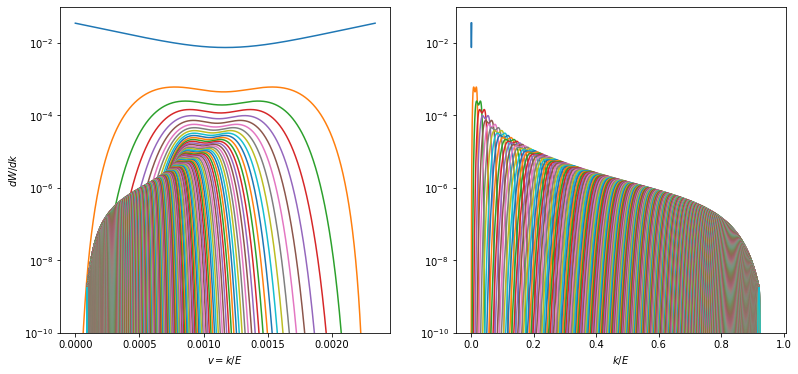

In [577]:
# non-linear compton scattering cross-section

E = 10e9
omega_L = 1.55
eta = 10
m = 0.512e6
chi = omega_L/E
xi = m*m/(E*omega_L)
theta_0 = 180
h_th = 1-np.cos(theta_0*np.pi/180)
alpha = 1/137

def v_max(n):
    return (1+n*chi)*(2*n*h_th)/(xi*(1+eta**2)+2*n*h_th)

def u_from_v(v, n):
    return v/(1+n*chi-v)

def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    return pref*np.sqrt(u*(1-u))

def p_n(u, u_n, n):
    jnp1 = sp.jv(n+1,z(u/u_n, n))**2
    jn   = sp.jv(n,z(u/u_n, n))**2
    jnm1 = sp.jv(n-1,z(u/u_n, n))**2

    pref = ((alpha**2)*m*m/(E*h_th))
    return -pref * (jn + eta**2 * (jn - jnm1/2 -jnp1/2)*(1+u*u/(2*(1+u))))


fig, ax = plt.subplots(1, 2, figsize=(13,6))

for n in range(1,10000, 10):

    v_n = v_max(n)
    print(np.round(v_n, 3))
    v = np.linspace(0, v_n, 1001)
    u = u_from_v(v, n)
    u_n = u_from_v(v_n, n)

    ax[0].plot(
        (v/n) , 
        p_n(u, u_n, n))
    ax[1].plot(v, p_n(u, u_n, n))



ax[0].set_yscale('log')
ax[0].set_xlabel(r'$v=k/E$')
ax[0].set_ylabel(r'$dW/dk$')
ax[0].set_ylim(1e-10, 1e-1)

ax[1].set_yscale('log')
ax[1].set_xlabel(r'$k/E$')
ax[1].set_ylim(1e-10, 1e-1)



1708.1641290322577
1.0004893387898361
[75.19379827 75.19003995 75.18628145 ...  1.30277842  1.06371415
  0.75215951]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[75.19379827 75.19003995 75.18628145 ...  1.30277842  1.06371415
  0.75215951]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[75.19379827 75.19003995 75.18628145 ...  1.30277842  1.06371415
  0.75215951]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


C:\Users\BCimr\AppData\Local\Temp\ipykernel_7812\774962896.py:69: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_yscale('log')
C:\Users\BCimr\AppData\Local\Temp\ipykernel_7812\774962896.py:74: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].set_yscale('log')


(1e-17, 11.220184543019636)

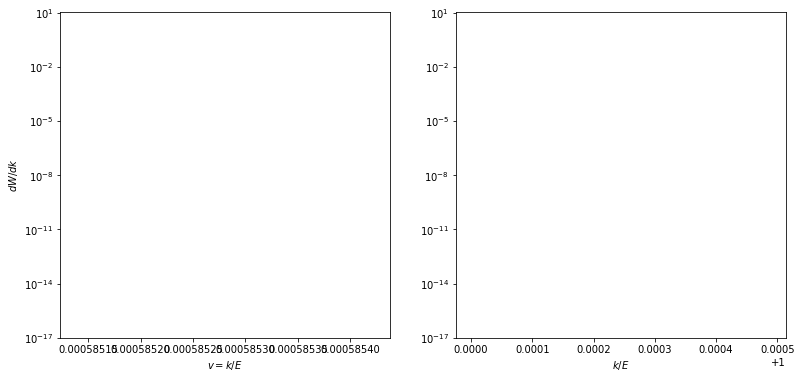

In [593]:
# non-linear BWPP cross-section

omega_p = 1e10
omega_L = 1.55
eta = 10
m = 0.512e6
m_eff = m*np.sqrt(1+eta**2)
chi = omega_L/E
xi = m*m/(E*omega_L)
theta_0 = 180
h_th = 1-np.cos(theta_0*np.pi/180)
alpha = 1/137


def u_max(n):
    return (n/4)*(1+2*n*omega_L*omega_p*h_th/(m_eff**2))

def v_max(n):
    u_n = u_max(n)
    a = (1 - n*omega_L/omega_p)
    return (a + np.sqrt(a**2 + 1/u_n))/2

def u_from_v(v, n):
    return 1/(v*(1+n*omega_L/omega_p-v))

def z(u, n):
    pref = 2*n*eta/np.sqrt(1+eta**2)
    return pref*np.sqrt(u*(1-u))

def p_n(u, u_n, n):
    print(z(u/u_n, n))
    jnp1 = sp.jv(n+1,z(u/u_n, n))**2
    jn   = sp.jv(n,z(u/u_n, n))**2
    jnm1 = sp.jv(n-1,z(u/u_n, n))**2

    pref = (4*np.pi*(alpha**2)/(m_eff**2 + 2*omega_L*omega_p*h_th))
    return pref * (1/(u*np.sqrt(u*(u-1)))) * (jn + eta**2 * (jn - jnm1/2 -jnp1/2)*(1-2*u))


fig, ax = plt.subplots(1, 2, figsize=(13,6))

n_0 = 2*m_eff**2/(omega_L*omega_p*h_th)

print(n_0)

for n in range(int(n_0)+1, int(n_0)+2, 10):

    #v_n = v_max(n)
    #print(v_n)
    #v = np.linspace(0, v_n, 10001)
    #u = u_from_v(v, n)
    #u_n = u_from_v(v_n, n)
    u_n = n*(omega_L*omega_p*h_th)/(2*(m_eff**2))
    print(u_n)
    #a = (1 + n*omega_L/omega_p)

    #v_max = (a + np.sqrt(a**2 - 1/u_n))/2

    u = np.linspace(1, u_n, 10000, endpoint=False)[1:]
    print(p_n(u, u_n, n))
    ax[0].plot(u/n, p_n(u, u_n, n))
    ax[1].plot(u, p_n(u, u_n, n))


ax[0].set_yscale('log')
ax[0].set_xlabel(r'$v=k/E$')
ax[0].set_ylabel(r'$dW/dk$')
ax[0].set_ylim(1e-17,)

ax[1].set_yscale('log')
ax[1].set_xlabel(r'$k/E$')
ax[1].set_ylim(1e-17,)


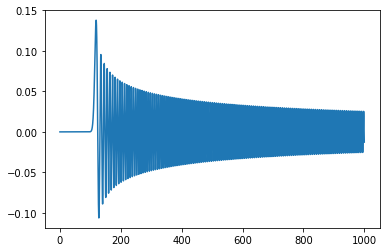

In [609]:

z = np.linspace(0, 1000, 10000)

plt.plot(z, sp.jv(115,z))

0.9590541906262894

13